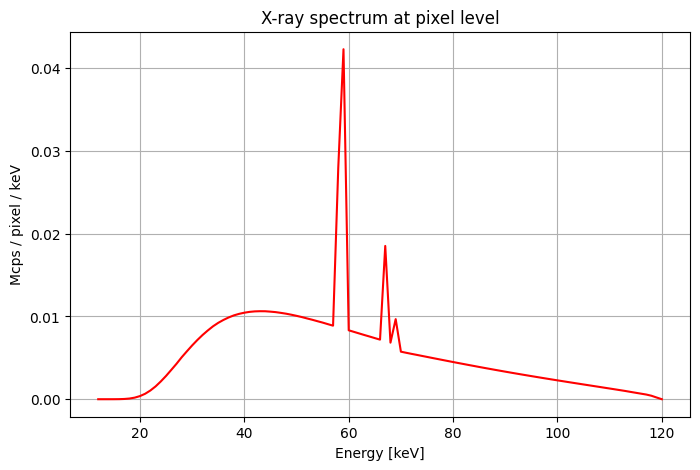

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- 参数 ----------------
I_mA = 1.0          # 管电流 [mA]
t_s = 1.0           # 曝光时间 [s]
A_pix = (0.05*0.05) # 像素面积 cm² (比如 0.5 mm × 0.5 mm)
d = 1.0             # 焦点-探测器距离 [m]

# ---------------- 读入 Spek 导出的数据 ----------------
# 假设文件两列：Energy[keV], Flux[#/(keV·cm²·mAs)@1m]
data = np.loadtxt("spek_120.txt", skiprows=1)
E = data[:,0]
flux = data[:,1]   # 光子通量谱

# ---------------- 转换为 Mcps/pixel ----------------
# 每 keV 的光子数 -> 乘以 mAs, 像素面积, 距离缩放
mAs = I_mA * t_s
flux_pix = flux * A_pix * (1/d**2) * mAs   # #/keV per pixel
rate_pix = flux_pix / t_s                  # cps/keV per pixel
rate_pix_Mcps = rate_pix / 1e6             # Mcps/keV per pixel

# ---------------- 绘图 ----------------
plt.figure(figsize=(8,5))
plt.plot(E, rate_pix_Mcps, 'r-')
plt.xlabel("Energy [keV]")
plt.ylabel("Mcps / pixel / keV")
plt.title("X-ray spectrum at pixel level")
plt.grid(True)
plt.show()
